## Word Cloud

data = https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt

In [243]:
# !pip install wordcloud

In [244]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np



In [245]:
alice_novel = open('alice_novel.txt', 'r').read()

In [246]:
type(alice_novel)

str

In [247]:
stopwords = set(STOPWORDS)

In [248]:
# stopwords

stopwords = kata yg tidak memiliki makna tambahan seperti imbuhan dll



In [249]:
# alice_worldcloud  = WordCloud(
#     background_color='white'
#     , max_words=2000
#     , stopwords=stopwords
# )

# alice_worldcloud.generate(alice_novel)

In [250]:
# plt.imshow(alice_worldcloud, interpolation='bilinear')
# plt.axis('off')

interpolation untuk blending disetiap pixel, tetapi kalau kasus nya seperti wordcloud tidak terlalu terpakai, hanya opsional

### Menambahkan STOPWORDS

In [251]:
# stopwords.add('said')
# alice_worldcloud.generate(alice_novel)

# fig = plt.figure()
# fig.set_figwidth(14)
# fig.set_figheight(18)


# plt.imshow(alice_worldcloud, interpolation='bilinear')
# plt.axis('off')

### Masking

In [252]:
alice_mask = np.array(Image.open('alice_mask.png'))

In [253]:
# alice_mask[400:501,400:501]

In [254]:
# fig = plt.figure()
# fig.set_figwidth(14)
# fig.set_figheight(18)


# plt.imshow(alice_mask, cmap=plt.cm.gray,interpolation='bilinear')
# plt.axis('off')

cmap=plt.cm.gray => maksud nya gambar hitam putih



In [255]:
# alice_worldcloud = WordCloud(
#     background_color='white'
#     , max_words=2000
#     , stopwords=stopwords
#     , mask=alice_mask
# )


# alice_worldcloud.generate(alice_novel)

# fig = plt.figure()
# fig.set_figwidth(14)
# fig.set_figheight(18)


# plt.imshow(alice_worldcloud, interpolation='bilinear')
# plt.axis('off')

## Regresion Plot

In [256]:
# !pip install searborn

In [257]:
import seaborn as sns
import pandas as pd

In [258]:
canada_immigration = pd.read_excel(
    'Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

In [259]:
canada_immigration.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [260]:
canada_immigration.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [261]:
total_immigrants = pd.DataFrame(canada_immigration[range(1980,2014)].sum(axis=0))

In [262]:
total_immigrants.reset_index(inplace=True)

In [263]:
total_immigrants.columns=['year','total']
total_immigrants.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<Axes: xlabel='year', ylabel='total'>

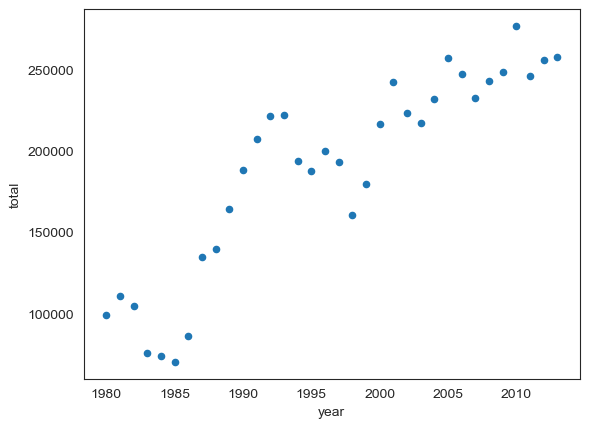

In [264]:
total_immigrants.plot(
    kind='scatter',
    x='year',
    y='total'
)


Text(0.5, 1.0, 'Total of immigration to Canada from 1980 to 2013')

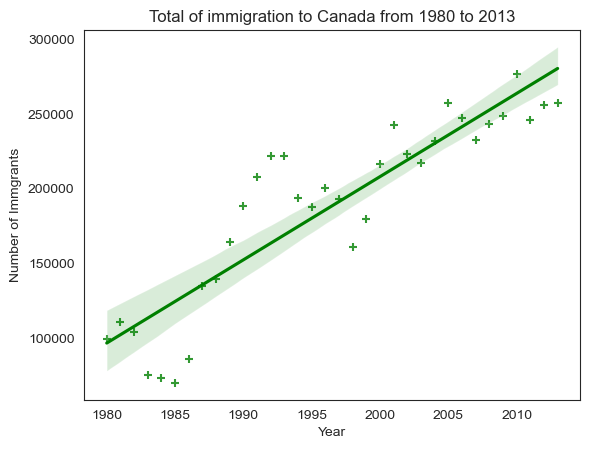

In [265]:

sns.set_style('white')
ax = sns.regplot(
    x='year',
    y='total',
    data=total_immigrants,
    color='green',
    marker='+'
)

ax.set_xlabel("Year")
ax.set_ylabel("Number of Immgrants")
ax.set_title("Total of immigration to Canada from 1980 to 2013")



## Folium

In [266]:
import folium
import pandas as pd
import numpy as np

In [267]:
incidents_data = pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')


In [268]:
incidents_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [269]:
limit = 100
incidentsdata =incidents_data.loc[0: limit, :]
incidents_data.shape

(150500, 13)

In [270]:
sflat = 37.77
sflong = -122.43

In [271]:
sfmap = folium.Map(location=[sflat, sflong], zoom_start=12)
sfmap

In [272]:
incidents_data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [273]:
incidents = folium.map.FeatureGroup()
for lat, long in zip (incidents_data['Y'], incidents_data['X'].values):
    incidents.add_child(
        folium.CircleMarker(
        [lat, long],
        radius=5,
        color='yellow',
        fill=True,
        fill_color='blue',
        fill_opacity=.6

        )
    )
sfmap.add_child(incidents)

KeyboardInterrupt: 